# The Bridge Machine Learnign Project.

# Telecom
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## Import dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

## Explore Data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check with .ifo() methods the datatypes and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### quick stastical summary of the numeric colmns with .describe()

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- SeniorCitizen : don´t have much usefull information

#### some columns are categorical, so we will need to converted.

## Data Analyss

### EDA

## CHeking for missing values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missings Data in our Dataset

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Let's chake the balance

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

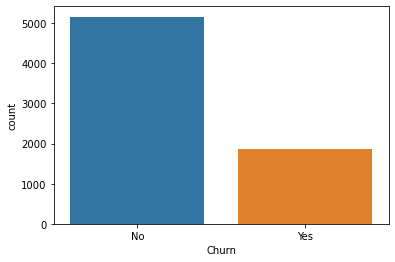

In [9]:
# Displot Inbalance
sns.countplot(data = df, x = 'Churn')

It looks a litle bit inbalance, nothing extreme but let handle to improve our future model.

### Explore Distribution of TotalCharges between Churn categories with a Violin PLot

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

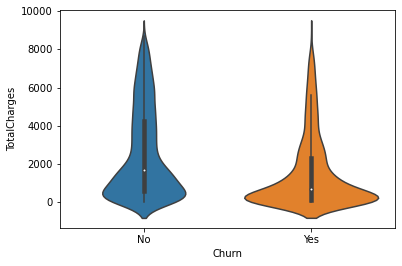

In [10]:
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

### Create boxplot for showing the distribution of total Charges per contract

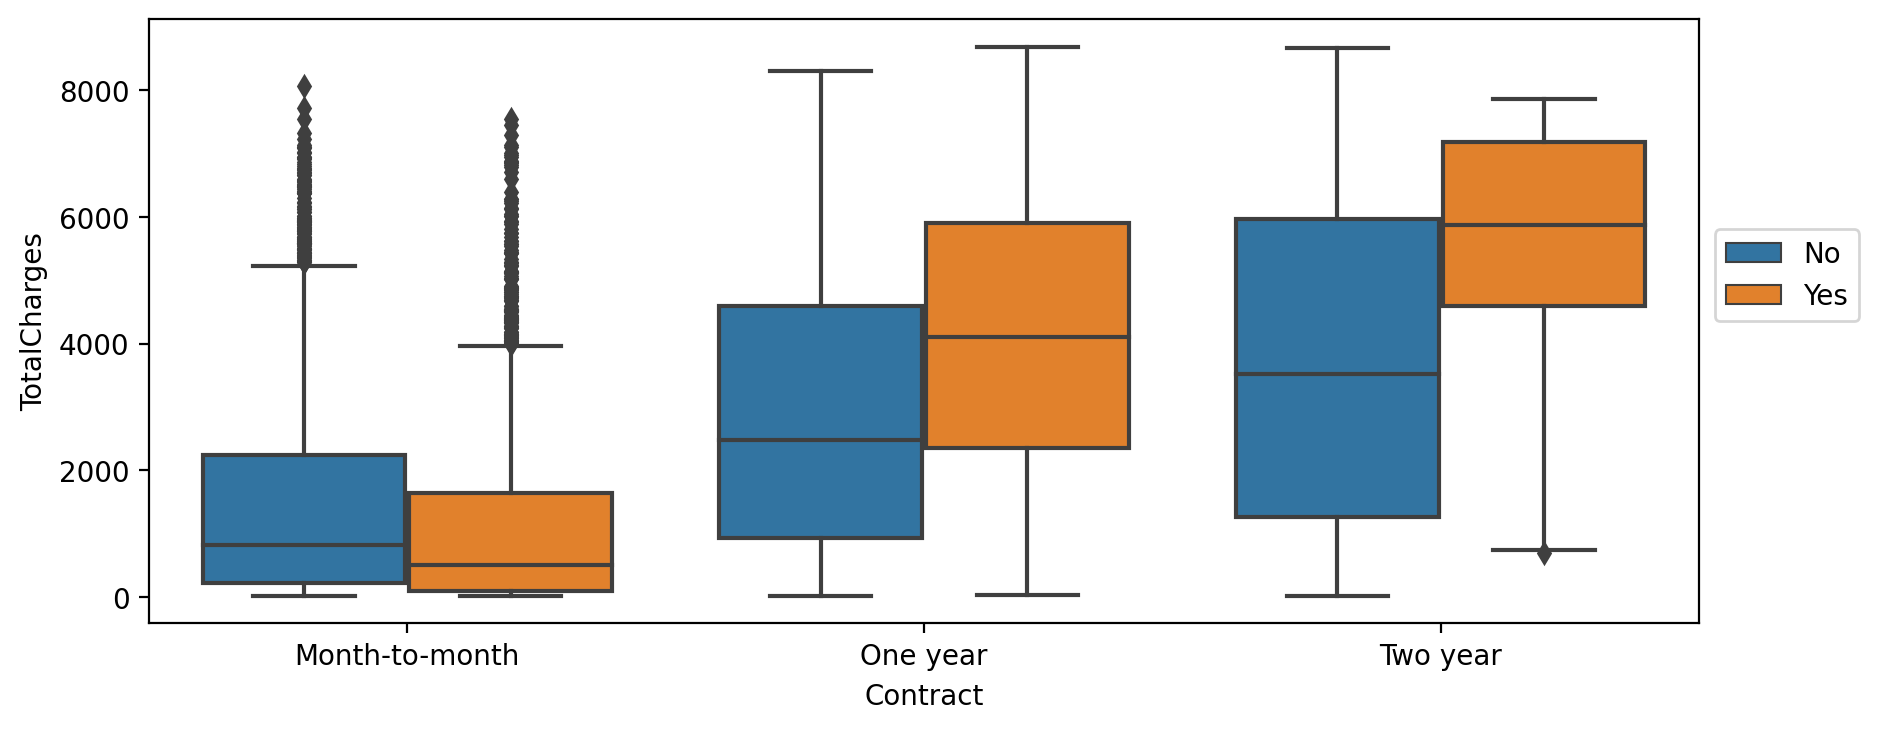

In [11]:
plt.figure ( figsize = ( 10,4 ), dpi = 200 )
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges' , hue = 'Churn')
plt.legend(loc = ( 1.01,0.5 ))

In [12]:
# Let's check the datatype in the data frame
df.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

 - Name of the columns that are object type

In [13]:
# Show me only the one´s that are the type of object.
for n in df.columns:
    if df[n].dtypes == 'object':
        print(n)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [14]:
# Function to check the corralted features
def correlation(dataset, threshold):
    col_corr = set() # Set of al the name of corralted colmns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold): # we are interst in absoluete value
                colname = corr_matrix.columns[i] # guetting the name
                col_corr.add(colname)
    return col_corr

## Let's create a bar plot  showing the correlation of the followring features to the cass label, but for categorical features we need to convert them into dummy.

['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

#### Lets make some dommies

In [15]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

- not adding dropFirst = True, it will be okei for visualization porpose. But wont be okei for machine learning model in that case we will need to equal to True.

- I use .corr() at the end to grab the correlation, with   we will se the  correlation of all this features

In [16]:
corr_df.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
tenure,0.015683,1.000000,-0.005285,0.005285,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,...,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181,0.354049,-0.354049
gender_Female,0.001819,-0.005285,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,0.005285,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.381912,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982


In [17]:
#  let  focus on churn yes
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

In [18]:
# we will drop the last row and the first one with slicing.
# we take out because for obvus reason the are high related between them
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1 : -1]

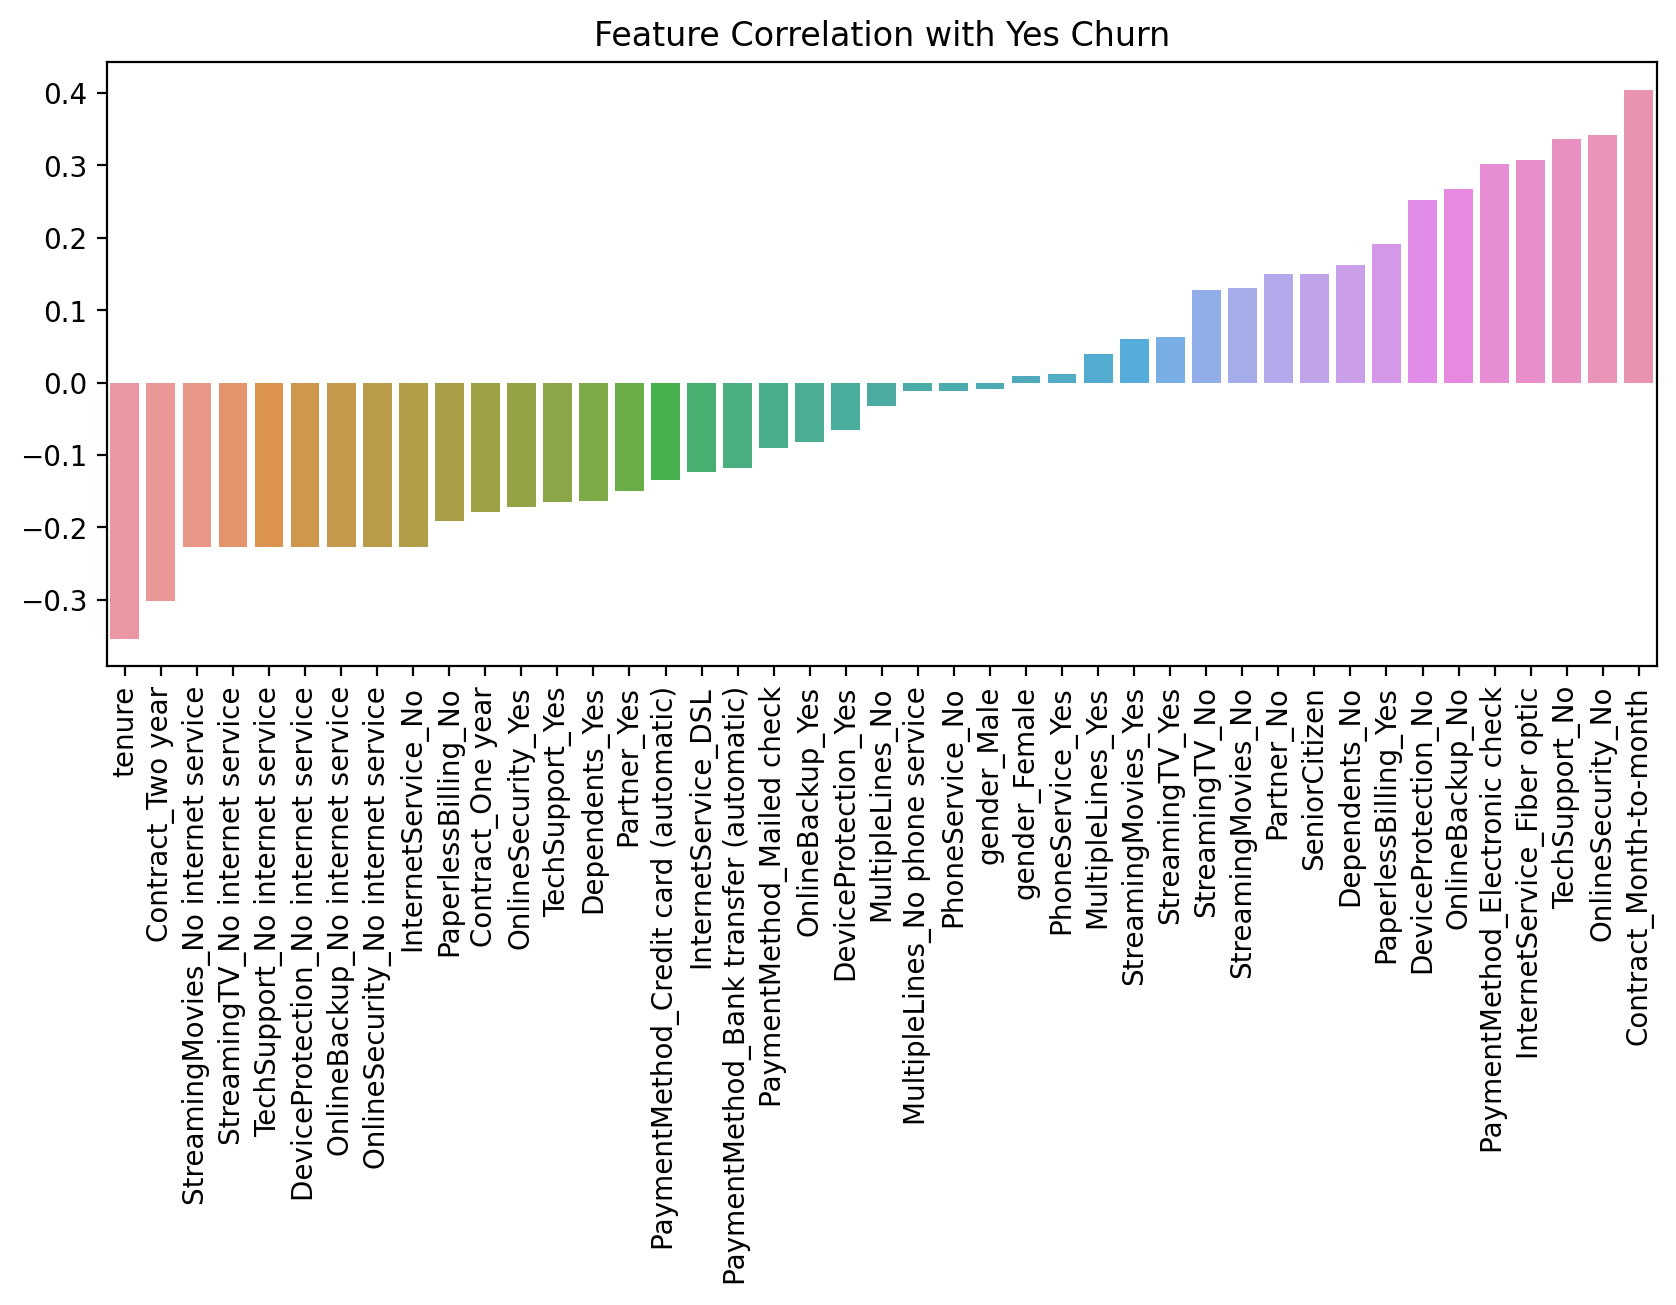

In [19]:
# plot correlation 
plt.figure(figsize = (10,4),dpi = 200)
plt.title("Feature Correlation with Yes Churn")
sns.barplot(x = corr_yes_churn.index,y = corr_yes_churn.values)
plt.xticks(rotation = 90);

### Churn Analysis

#### The contract types availables

In [20]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [21]:
# show Ternure
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

#### Ternure : the amounth of months a customer was or has been on a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

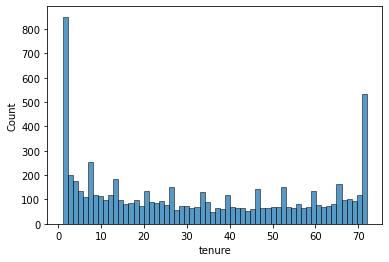

In [22]:
# lets plot a ternnure distribution
sns.histplot(data = df, x = 'tenure', bins = 60)

#### Histogram separated by two addtional features, Churn and Contract

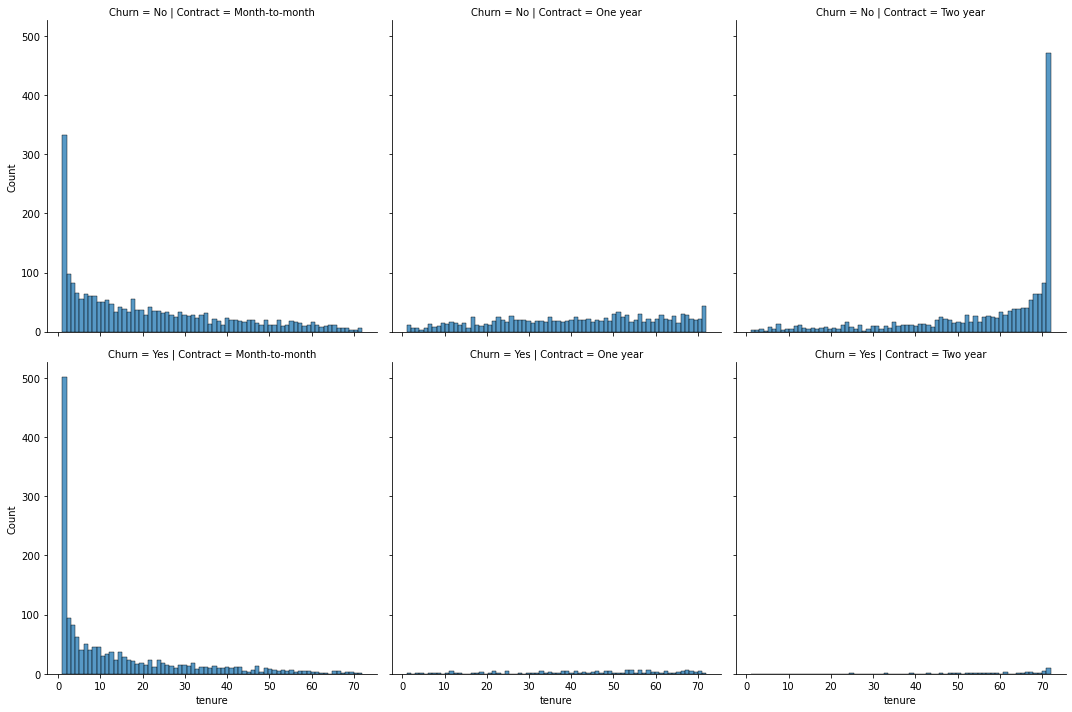

In [23]:
## Something that we can show to the tele enterprise the number of chage by month
sns.displot(data = df, x = 'tenure', bins = 70,
            col = 'Contract', row = 'Churn')

#### Lets dsplay a scatter plot of Total carges versus Montly Charges.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

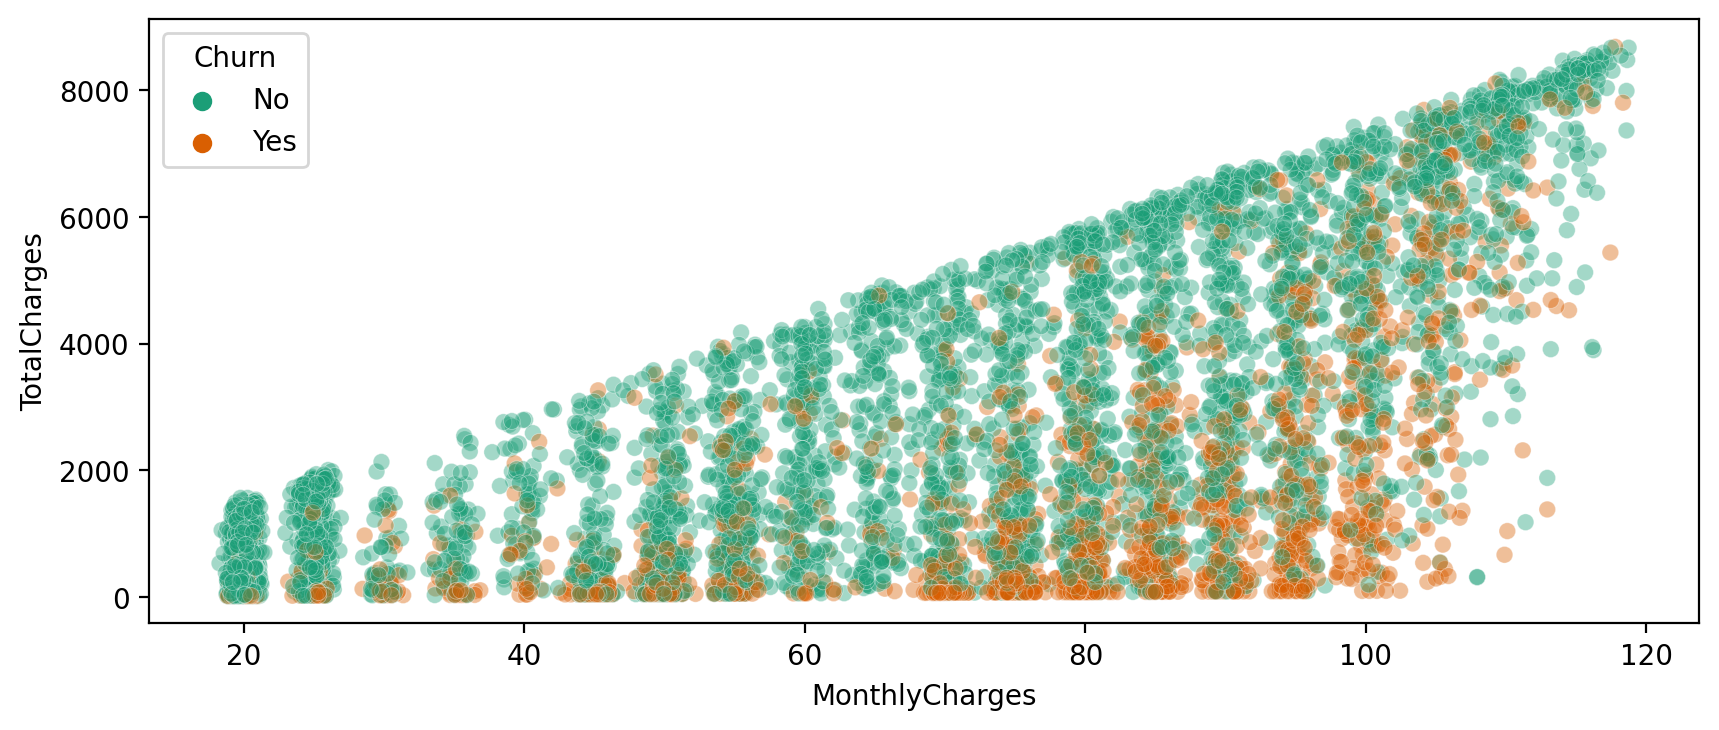

In [24]:
plt.figure(figsize = (10 , 4), dpi = 200)
sns.scatterplot(data = df,x = 'MonthlyCharges', 
                y = 'TotalCharges', hue = 'Churn',
               alpha = 0.4,linewidth = 0.3, 
               palette = 'Dark2')

- People churn a lot when charge by month are higher.

#### Create Cohorts Based on Ternure
- we will be threating each unique length, as its own cohort.

Treating each unique ternure group as cohort, calculate the churn rate per cohort.

In [25]:
# group by yes churn
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [26]:
# group by no churn
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [27]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [28]:
# Percentahe people that churn
churn_rate = 100 * yes_churn / ( no_churn + yes_churn)

In [29]:
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


<AxesSubplot:xlabel='tenure'>

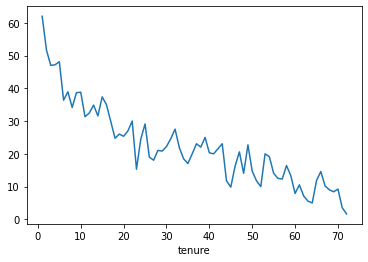

In [30]:
# PLot the porcentage of Churn rate.
churn_rate.transpose()['customerID'].plot()

- Lest make the tenure colunm values, create a new column Tenure Cohor that create 4 separaties categories :
-- 0-12 Months
-- 12-24 Months
-- 24-48 Months
-- 'Over 48 Months

In [31]:

#Let make a function for cohort.
def cohort(tenure):
    if tenure < 13:
        return '0 - 12 Months'
    elif tenure < 25:
        return'12-24 Months'
    elif tenure < 40:
        return '24 - 48 Months'
    return 'Over 48 Months'
    

In [32]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

#### We can analyze the people tahat stay in the different Cohorts groups

In [33]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0 - 12 Months,1
1,24 - 48 Months,34
2,0 - 12 Months,2
3,Over 48 Months,45
4,0 - 12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0 - 12 Months,11
7030,0 - 12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

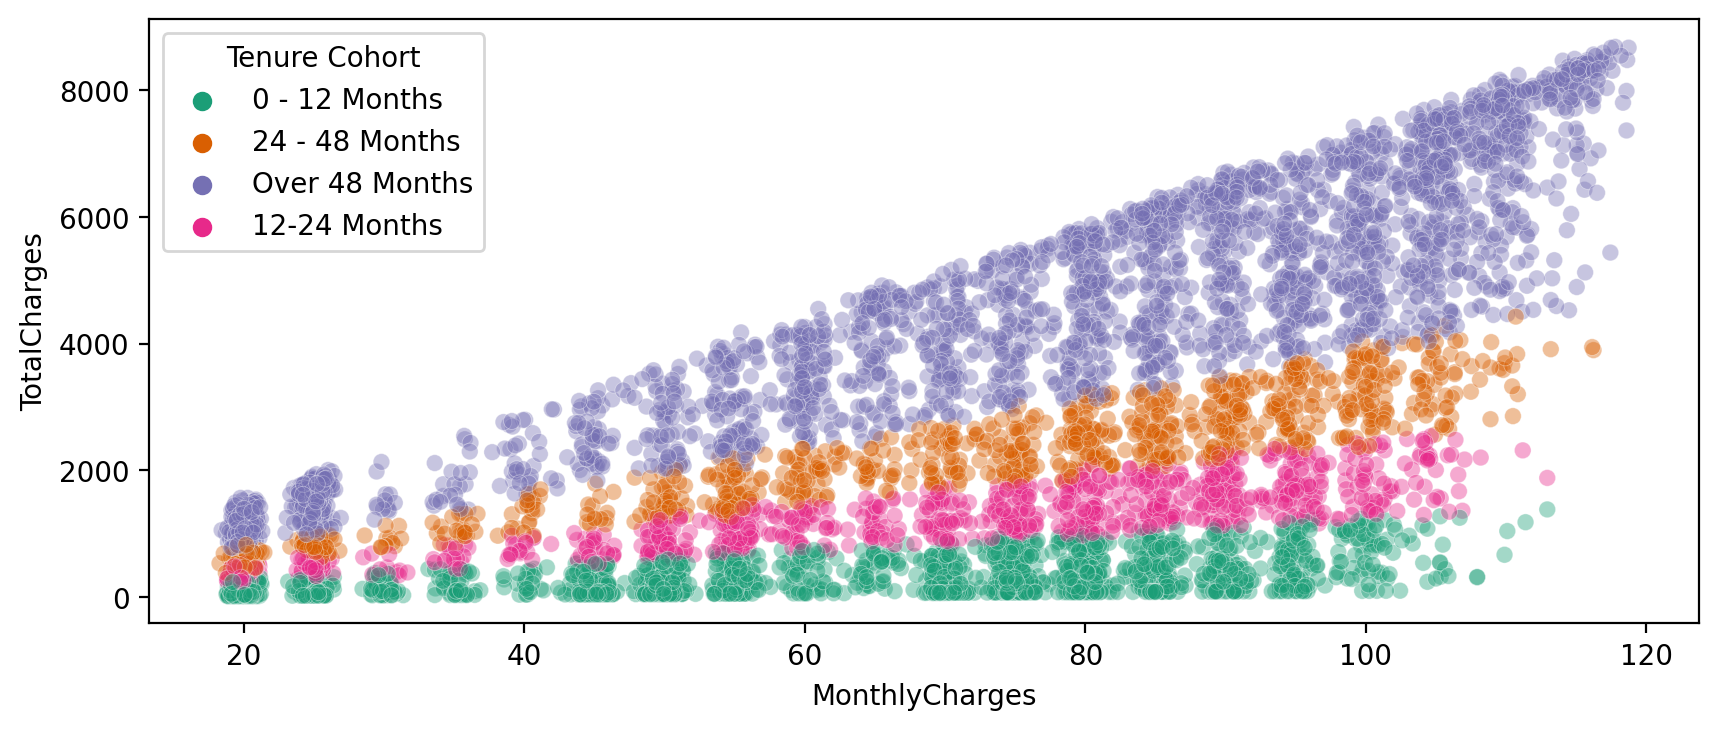

In [34]:
# PLot coloring by Tenure cohort
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges',
               hue = 'Tenure Cohort', alpha = 0.4,
               linewidth = 0.3, palette = 'Dark2')

 ### plot showing the churn count per cohort

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

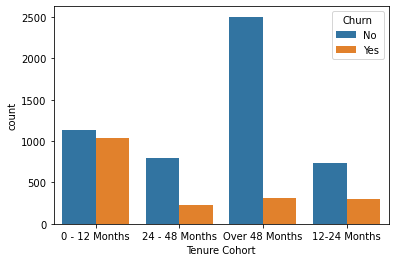

In [35]:
sns.countplot(data = df, x = 'Tenure Cohort',hue = 'Churn')

### Grid of Count plots showing counts per Tenure cohort

<Figure size 2800x800 with 0 Axes>

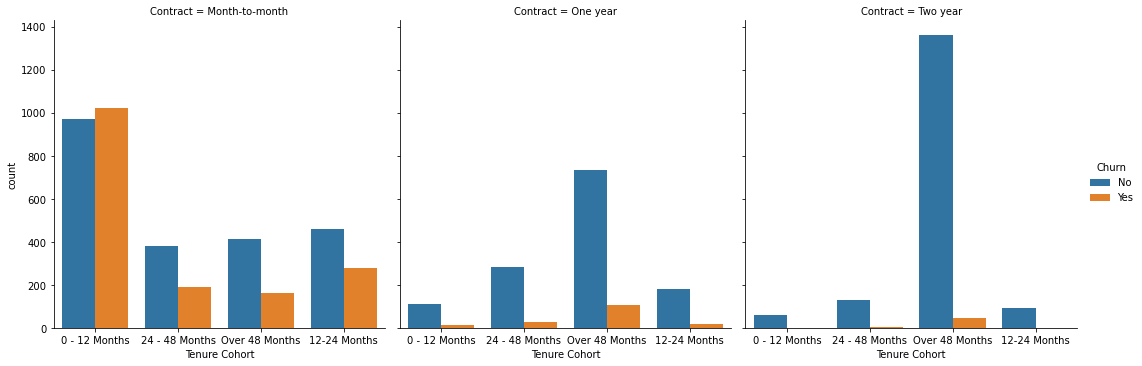

In [36]:
plt.figure(figsize = (14,4), dpi = 200)
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', kind = 'count',
           col = 'Contract')

## Lets start training the model


## Separate feature
X and y, for train and test.

In [37]:
# Import collections library for inbalace aproach 
from collections import Counter

In [38]:
# drop Churyn cause is our target 
# and customer id u just indentifier we don´t 
# really need it
X = df.drop(['Churn','customerID'], axis = 1)

### Here we will get dommies for X and with drop_first = True for our machine learning model

In [39]:
X = pd.get_dummies(X,drop_first=True)

In [40]:
y = df['Churn']

#### Let handle first the Imbalance, for get better result: we uso two approach, the second one is better that the first one, just for a litle

In [41]:
from imblearn.over_sampling import SMOTE

In [41]:
# Implementing Oversampling for Handling Imbalance
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

In [43]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class = {k}, n{v} ({dist}%)')

Class = No, n5163 (50.0%)
Class = Yes, n5163 (50.0%)


In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [43]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o',oversample), ('u',undersample)]
pipeline= Pipeline(steps = steps)
# Transform the dataset
X,y = pipeline.fit_resample(X,y)

In [44]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class = {k}, n{v} ({dist}%)')

Class = No, n5163 (50.0%)
Class = Yes, n5163 (50.0%)


### Perform a train test split
- holding ut 10% of the data for testing
- randm_state : 101

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.1, random_state=101)

In [47]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24 - 48 Months,Tenure Cohort_Over 48 Months
3533,0,55,94.750000,5276.100000,0,1,0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
1091,0,23,57.750000,1282.850000,0,1,1,1,0,0,...,0,1,0,1,0,0,1,1,0,0
511,0,1,49.900000,49.900000,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1397,0,12,20.150000,260.700000,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4693,0,60,49.750000,3069.450000,0,1,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,20,25.550000,507.400000,0,1,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
5695,0,2,44.350000,81.250000,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8006,0,16,63.683704,1045.491713,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1361,0,55,19.400000,1083.000000,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1


 ## I will use first decision tree performance

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier(max_depth=6)

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [51]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [52]:
preds = dt.predict(X_test)

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.78      0.80      0.79       497
         Yes       0.81      0.79      0.80       536

    accuracy                           0.80      1033
   macro avg       0.80      0.80      0.80      1033
weighted avg       0.80      0.80      0.80      1033



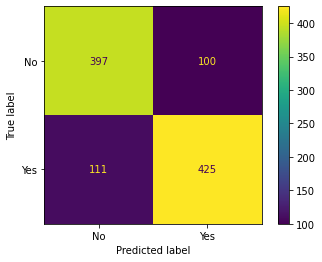

In [54]:
plot_confusion_matrix(dt,X_test,y_test)

#### Let' check Important Features

In [55]:
dt.feature_importances_

array([6.48935172e-05, 4.13742058e-02, 1.04332601e-01, 2.12791996e-02,
       3.52640719e-04, 0.00000000e+00, 2.17629701e-03, 2.24565506e-02,
       2.82763164e-02, 0.00000000e+00, 1.09473812e-03, 1.47538527e-02,
       0.00000000e+00, 4.88975065e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.74654493e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.61365166e-03,
       2.92470883e-01, 3.52985874e-01, 0.00000000e+00, 1.81740822e-02,
       1.75751237e-03, 9.29130837e-03, 0.00000000e+00, 1.82437597e-04,
       0.00000000e+00])

In [56]:
imp_features = pd.DataFrame(data = dt.feature_importances_, 
                            index = X.columns, columns = ['Feat imp'])

In [57]:
imp_feats = imp_features.sort_values('Feat imp')

In [58]:
imp_feats

,Feat imp
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
OnlineBackup_Yes,0.000000
OnlineBackup_No internet service,0.000000


 - let´se get rid of the features = 0 for plotting

In [59]:
imp_feats = imp_feats[imp_feats['Feat imp'] > 0]

In [60]:
# show the data dataframe with out zeros
imp_feats

,Feat imp
SeniorCitizen,0.000065
Tenure Cohort_24 - 48 Months,0.000182
gender_Male,0.000353
InternetService_Fiber optic,0.001095
PaymentMethod_Electronic check,0.001758
Dependents_Yes,0.002176
StreamingMovies_Yes,0.002614
PaymentMethod_Mailed check,0.009291
InternetService_No,0.014754
PaymentMethod_Credit card (automatic),0.018174


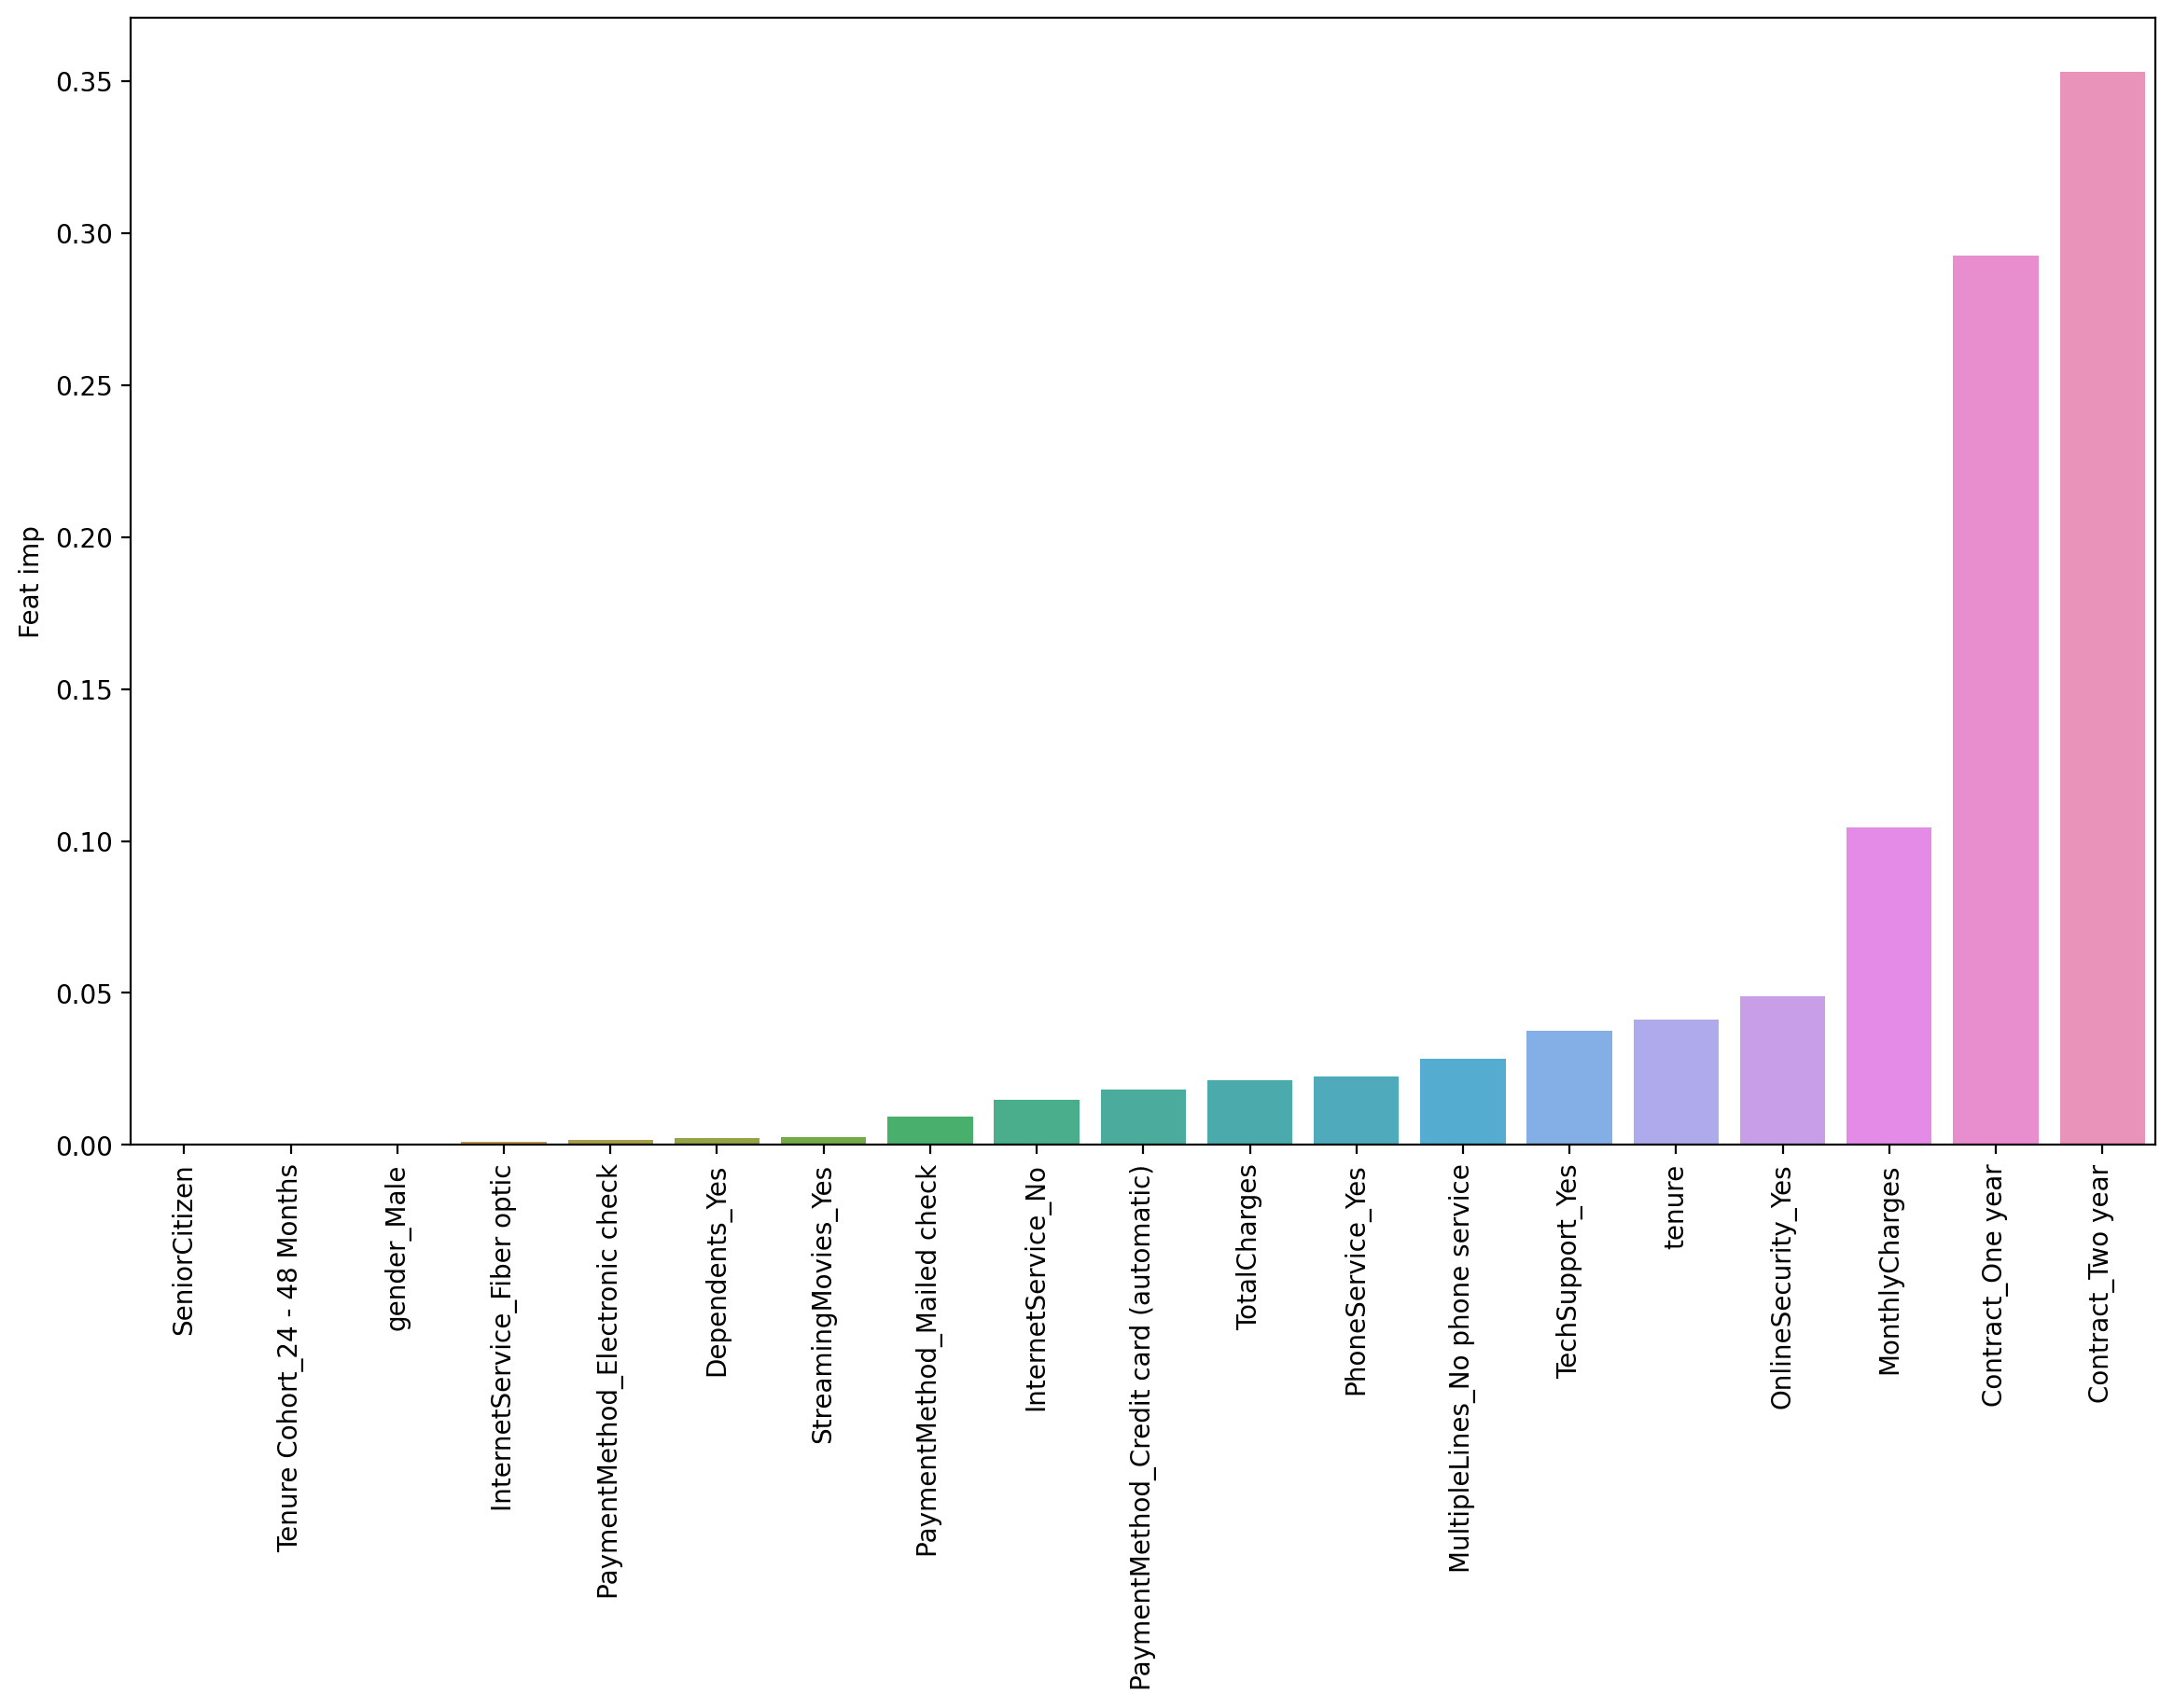

In [61]:
#plot important features
plt.figure(figsize = (14,8), dpi = 200)
sns.barplot(data = imp_feats, 
            x = imp_feats.index, y = 'Feat imp')
plt.xticks( rotation = 90 );

In [62]:
from sklearn.tree import plot_tree

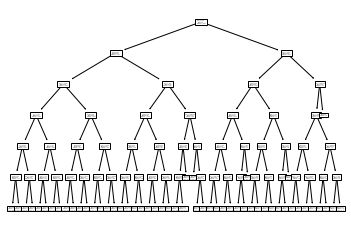

In [63]:
plot_tree(dt);

#### Random Forest CLassifier 

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(max_depth=6)

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [67]:
preds = rf.predict(X_test)

In [68]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.76      0.79       497
         Yes       0.79      0.84      0.82       536

    accuracy                           0.80      1033
   macro avg       0.80      0.80      0.80      1033
weighted avg       0.80      0.80      0.80      1033



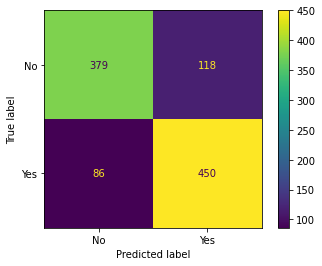

In [69]:
plot_confusion_matrix(rf,X_test,y_test)

# Boosted Trees

In [70]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [71]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [72]:
gb_model = GradientBoostingClassifier()

In [73]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [74]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [75]:
ada_preds = ada_model.predict(X_test)

In [76]:
gb_pred = gb_model.predict(X_test)

In [77]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.84      0.78      0.81       497
         Yes       0.81      0.86      0.84       536

    accuracy                           0.82      1033
   macro avg       0.83      0.82      0.82      1033
weighted avg       0.82      0.82      0.82      1033



In [78]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

          No       0.83      0.80      0.81       497
         Yes       0.82      0.85      0.83       536

    accuracy                           0.82      1033
   macro avg       0.83      0.82      0.82      1033
weighted avg       0.82      0.82      0.82      1033



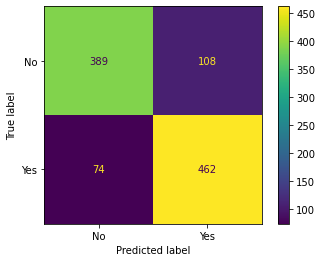

In [79]:
plot_confusion_matrix(ada_model,X_test,y_test)

In [80]:
# dictionary of hyperparameter values to search
search_space = {
    "n_estimators"  : [100, 200, 500],
    "max_depth"     : [3, 6, 9],
    "gamma"         : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [81]:
from sklearn.model_selection import GridSearchCV


### assifier is optimized by cross-validation, which is done using the GridSearchCV 

In [82]:
from sklearn import svm

In [83]:
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8102613746369797

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
cross_val_score(svm.SVC(kernel = 'rbf', C = 10,gamma = 'auto'),X_train,y_train,cv = 5)

array([0.79881657, 0.78483055, 0.80473373, 0.80032293, 0.79440258])

In [86]:
cross_val_score(svm.SVC(kernel = 'rbf', C = 20,gamma = 'auto'),X_train,y_train,cv = 5)

array([0.79666487, 0.7859064 , 0.8063475 , 0.80139935, 0.79332616])

In [87]:
clf = GridSearchCV(svm.SVC(gamma = 'auto'),
                  {'C' : [1,10,20],
                  'kernel' : ['rbf'],
                  }, cv = 5, return_train_score=False)
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([5.23128948, 6.23023853, 5.96806459]),
 'std_fit_time': array([0.17346348, 0.53623147, 0.16960795]),
 'mean_score_time': array([1.72537518, 1.61288667, 1.63810515]),
 'std_score_time': array([0.02581144, 0.02333581, 0.0369764 ]),
 'param_C': masked_array(data=[1, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'rbf'}],
 'split0_test_score': array([0.79989242, 0.79881657, 0.79666487]),
 'split1_test_score': array([0.78429263, 0.78483055, 0.7859064 ]),
 'split2_test_score': array([0.8041958 , 0.80473373, 0.8063475 ]),
 'split3_test_score': array([0.79332616, 0.80032293, 0.80139935]),
 'split4_test_score': array([0.7868676 , 0.79440258, 0.79332616]),
 'mean_test_score': ar

In [88]:
df = pd.DataFrame(clf.cv_results_)

In [89]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.231289,0.173463,1.725375,0.025811,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.799892,0.784293,0.804196,0.793326,0.786868,0.793715,0.007534,3
1,6.230239,0.536231,1.612887,0.023336,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.798817,0.784831,0.804734,0.800323,0.794403,0.796621,0.006757,2
2,5.968065,0.169608,1.638105,0.036976,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.796665,0.785906,0.806347,0.801399,0.793326,0.796729,0.006972,1


In [90]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.793715
1,10,rbf,0.796621
2,20,rbf,0.796729


In [91]:
clf.best_score_

0.7967288569673266

In [92]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}